In [168]:
import numpy as np
import pandas as pd

# **Date Time in Pandas**

## **TimeStamp Object**
Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### **Pandas timestamp**

In [169]:
#Creating a TimeStamp
pd.Timestamp('2023/10/4')

Timestamp('2023-10-04 00:00:00')

In [170]:
#Variations
pd.Timestamp('2025-10-4')

Timestamp('2025-10-04 00:00:00')

In [171]:
#Only Year
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [172]:
#Using Text
pd.Timestamp("4th October 2025")

Timestamp('2025-10-04 00:00:00')

In [173]:
#Providing Time also
pd.Timestamp('4th October 2025 8:43AM')
pd.Timestamp('2023/10/4/8:43PM')

Timestamp('2023-10-04 20:43:00')

### **Python Datetime object**

In [174]:
#Using Python datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2025,10,4,8,53))
x

Timestamp('2025-10-04 08:53:00')

In [175]:
#Fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

0

In [176]:
# why separate objects to handle data and time when python already has datetime functionality?



*   syntax wise datetime is very convenient
*   But the performance takes a hit while working with huge data. List vs Numpy Array
*   The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
*   The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.




### **numpy datetime64 datatype**

In [177]:
date = np.array(['2025-10-04'], dtype=np.datetime64)
date

array(['2025-10-04'], dtype='datetime64[D]')

In [178]:
date + np.arange(10)

array(['2025-10-04', '2025-10-05', '2025-10-06', '2025-10-07',
       '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-11',
       '2025-10-12', '2025-10-13'], dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### **DateTimeIndex Object**
DateTimeIndex is a collection of Timestamp


In [179]:
#from Strings
pd.DatetimeIndex(['2025/10/4','2025/10/5','2025/10/6'])

DatetimeIndex(['2025-10-04', '2025-10-05', '2025-10-06'], dtype='datetime64[ns]', freq=None)

In [180]:
#using python datetime object
pd.DatetimeIndex([dt.datetime(2025,10,4),dt.datetime(2025,10,5),dt.datetime(2025,10,6)])

DatetimeIndex(['2025-10-04', '2025-10-05', '2025-10-06'], dtype='datetime64[ns]', freq=None)

In [181]:
#using pd.timestamp
dt_index = pd.DatetimeIndex([pd.Timestamp('2025/10/4'),pd.Timestamp('2025/10/5'),pd.Timestamp('2025/10/6')])
dt_index

DatetimeIndex(['2025-10-04', '2025-10-05', '2025-10-06'], dtype='datetime64[ns]', freq=None)

In [182]:
#using datatimeindex as series index
pd.Series([1,2,3], index = dt_index)

,0
2025-10-04,1
2025-10-05,2
2025-10-06,3


### **DateRange Function**

In [183]:
#generate daily dates in a given range
pd.date_range(start='2025/10/4',end='2025/10/30',freq='D')  #D, 2D, 3D dates ka beech ka gap hai actually

DatetimeIndex(['2025-10-04', '2025-10-05', '2025-10-06', '2025-10-07',
               '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-11',
               '2025-10-12', '2025-10-13', '2025-10-14', '2025-10-15',
               '2025-10-16', '2025-10-17', '2025-10-18', '2025-10-19',
               '2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23',
               '2025-10-24', '2025-10-25', '2025-10-26', '2025-10-27',
               '2025-10-28', '2025-10-29', '2025-10-30'],
              dtype='datetime64[ns]', freq='D')

In [184]:
# alternate days in a given range
pd.date_range(start='2025/10/4',end='2025/10/30',freq='2D')

DatetimeIndex(['2025-10-04', '2025-10-06', '2025-10-08', '2025-10-10',
               '2025-10-12', '2025-10-14', '2025-10-16', '2025-10-18',
               '2025-10-20', '2025-10-22', '2025-10-24', '2025-10-26',
               '2025-10-28', '2025-10-30'],
              dtype='datetime64[ns]', freq='2D')

In [185]:
# alternate days in a given range
pd.date_range(start='2025/10/4',end='2025/10/30',freq='B')  #B for business days

DatetimeIndex(['2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09',
               '2025-10-10', '2025-10-13', '2025-10-14', '2025-10-15',
               '2025-10-16', '2025-10-17', '2025-10-20', '2025-10-21',
               '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-27',
               '2025-10-28', '2025-10-29', '2025-10-30'],
              dtype='datetime64[ns]', freq='B')

In [186]:
# W -> one week per day
pd.date_range(start='2025/10/4',end='2025/10/30',freq='W-THU')

DatetimeIndex(['2025-10-09', '2025-10-16', '2025-10-23', '2025-10-30'], dtype='datetime64[ns]', freq='W-THU')

In [187]:
# H -> Hourly data(factor)
pd.date_range(start='2025/10/4',end='2025/10/30',freq='6H')  # H, 2H, 3H, 4H

/tmp/ipython-input-3948618039.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2025/10/4',end='2025/10/30',freq='6H')  # H, 2H, 3H, 4H


DatetimeIndex(['2025-10-04 00:00:00', '2025-10-04 06:00:00',
               '2025-10-04 12:00:00', '2025-10-04 18:00:00',
               '2025-10-05 00:00:00', '2025-10-05 06:00:00',
               '2025-10-05 12:00:00', '2025-10-05 18:00:00',
               '2025-10-06 00:00:00', '2025-10-06 06:00:00',
               ...
               '2025-10-27 18:00:00', '2025-10-28 00:00:00',
               '2025-10-28 06:00:00', '2025-10-28 12:00:00',
               '2025-10-28 18:00:00', '2025-10-29 00:00:00',
               '2025-10-29 06:00:00', '2025-10-29 12:00:00',
               '2025-10-29 18:00:00', '2025-10-30 00:00:00'],
              dtype='datetime64[ns]', length=105, freq='6h')

In [188]:
# M -> Month end
pd.date_range(start='2025/10/1',end='2025/12/30',freq='M')

/tmp/ipython-input-3316823638.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2025/10/1',end='2025/12/30',freq='M')


DatetimeIndex(['2025-10-31', '2025-11-30'], dtype='datetime64[ns]', freq='ME')

In [189]:
# MS -> Month start
pd.date_range(start='2025/10/1',end='2025/12/30',freq='MS')

DatetimeIndex(['2025-10-01', '2025-11-01', '2025-12-01'], dtype='datetime64[ns]', freq='MS')

In [190]:
# A -> Year end
pd.date_range(start='2025/10/4',end='2030/10/30',freq='A')

/tmp/ipython-input-3893091161.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2025/10/4',end='2030/10/30',freq='A')


DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [191]:
# using periods(number of results)
pd.date_range(start='2025/10/4',periods=10, freq='H')

/tmp/ipython-input-2197108986.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2025/10/4',periods=10, freq='H')


DatetimeIndex(['2025-10-04 00:00:00', '2025-10-04 01:00:00',
               '2025-10-04 02:00:00', '2025-10-04 03:00:00',
               '2025-10-04 04:00:00', '2025-10-04 05:00:00',
               '2025-10-04 06:00:00', '2025-10-04 07:00:00',
               '2025-10-04 08:00:00', '2025-10-04 09:00:00'],
              dtype='datetime64[ns]', freq='h')

### **to_DateTime Function**
converts an existing objects to pandas timestamp/datetimeindex object

In [192]:
#simple series example
s = pd.Series(['2025/10/4','2025/10/5','2025/10/6'])  #abhi ye dates as a string hain series me

pd.to_datetime(s).dt.day_name()   #now converted to datetime  (dt accessor hai like str in string)

,0
0,Saturday
1,Sunday
2,Monday


In [193]:
#with errors
s = pd.Series(['2025/10/4','2025/10/5','2025/20/6']) #month 20 daal dia tu error ayega
pd.to_datetime(s, errors = 'coerce')  #errors = 'coerce' means error ignore karega

,0
0,2025-10-04
1,2025-10-05
2,NaT


In [194]:
df = pd.read_csv('/content/expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [195]:
df.info()  #date wala column is a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [196]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()  #convert hogaya datetime me

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [197]:
df['Date'].dt.year
df['Date'].dt.month_name()
df['Date'].dt.day_name()

,Date
0,Wednesday
1,Wednesday
2,Tuesday
3,Tuesday
4,Tuesday
...,...
272,Monday
273,Monday
274,Sunday
275,Sunday


### **Plotting**

In [198]:
import matplotlib.pyplot as plt

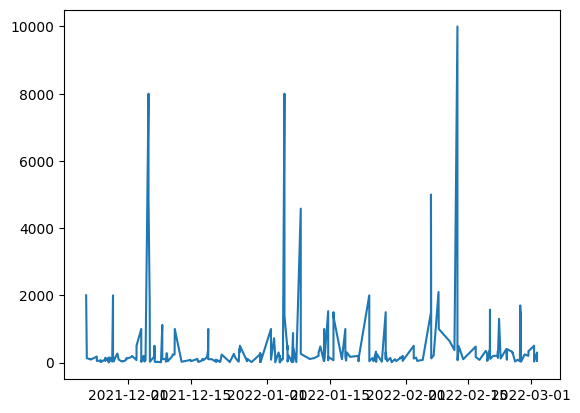

In [199]:
plt.plot(df['Date'],df['INR'])

In [200]:
df['Day_name'] = df['Date'].dt.day_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='Day_name'>

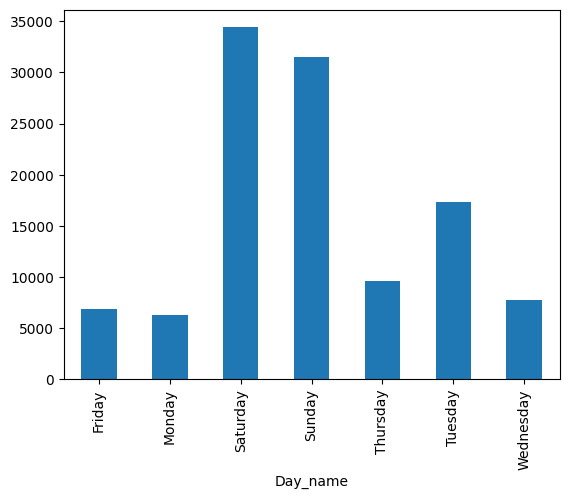

In [201]:
df.groupby('Day_name')['INR'].sum().plot(kind='bar')

In [202]:
df['Month _name'] = df['Date'].dt.month_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Day_name,Month _name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='Month _name'>

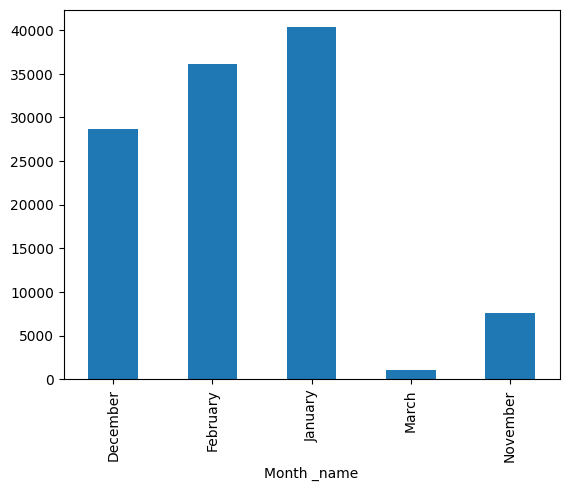

In [203]:
df.groupby(df['Month _name'])['INR'].sum().plot(kind='bar')